- Frequentist
- Bayesian

In [3]:
import numpy as np
import random

## Bài 2

In [42]:
def wining_rate():
    num_floor = 0
    for _ in range(100):
        dice = np.random.randint(1, 7)
        if dice <= 2:
            num_floor -= 1
            num_floor = max(0, num_floor)
        elif dice > 2 and dice <= 5:
            num_floor += 1
        else:
            dice = np.random.randint(1, 7)
            num_floor += dice
        if np.random.random() <= 0.001:
            num_floor = 0
    return num_floor >= 60

In [43]:
num_sim = 10_000
num_win = 0
for _ in range(num_sim):
    num_win += wining_rate()
num_win / num_sim * 100

78.03999999999999

## Bài 3

In [45]:
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
int('./Names/yob2000.txt'[-8:-4])

2000

In [51]:
paths = glob('./Names/*.txt')
li = []
for path in paths:
    year = int(path[-8:-4]) 
    df = pd.read_csv(path, names=['name', 'sex', 'occurrence'])
    df['year'] = year
    li.append(df)

df = pd.concat(li)

### Vẽ biểu đồ tổng số trẻ em sinh ra theo giới tính và năm

In [64]:
df.head(2)

,name,sex,occurrence,year
0,Emily,F,25956,2000
1,Hannah,F,23082,2000


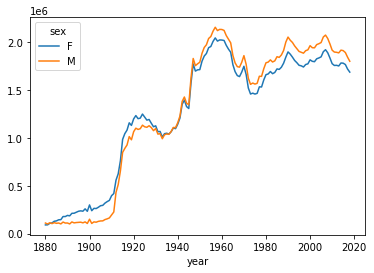

In [70]:
df.groupby(['sex', 'year']).occurrence.sum().to_frame().reset_index() \
.pivot(index='year', columns='sex', values='occurrence').plot();

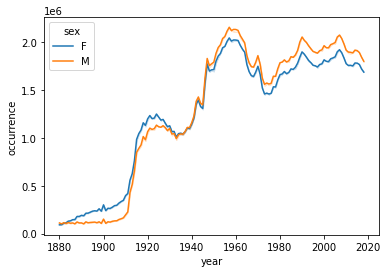

In [75]:
sns.lineplot(data=df, x='year', y='occurrence', hue='sex', estimator='sum', ci=0);

### Tạo subset gồm top 1000 cái tên phổ biến mỗi năm theo từng loại giới tính

In [89]:
df.set_index('name').groupby(['sex', 'year']).occurrence.nlargest(1000).to_frame()

occurrence
sex year name                 
F   1880 Mary             7065
         Anna             2604
         Emma             2003
         Elizabeth        1939
         Minnie           1746
...                        ...
M   2018 Korbyn            207
         Randall           207
         Benton            206
         Coleman           206
         Markus            206

[277877 rows x 1 columns]

In [107]:
top_1000 = df.groupby(['sex', 'year'])[['name', 'occurrence']].apply(lambda x : x.nlargest(1000, 'occurrence')).droplevel(2)

### Vẽ biểu đồ số lượng các bé sinh theo năm có các tên sau: Philip, Harry, Elizabeth, Marilyn

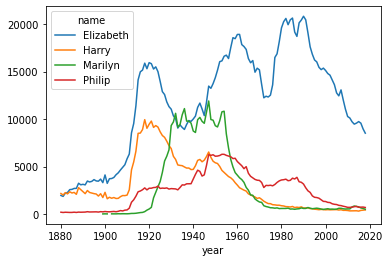

In [105]:
names = ['Philip', 'Harry', 'Elizabeth', 'Marilyn']
df.query("name in @names").groupby(['name', 'year']).occurrence.sum() \
.to_frame().reset_index().pivot(index='year', columns='name', values='occurrence').plot();

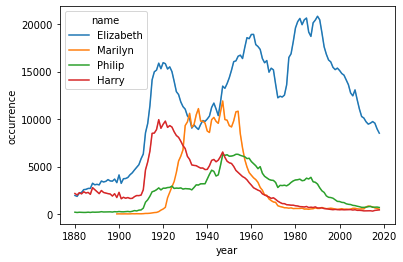

In [106]:
sns.lineplot(data=df.query("name in @names"), x='year', y='occurrence', hue='name', estimator='sum', ci=0);

### Vẽ biểu đồ thể hiện sự đa dạng trong việc đặt tên qua các năm theo từng giới tính 
### (thể hiện bằng xu hướng giảm dần từng năm của tổng tỷ lệ % của top 1000 tên phổ biến)

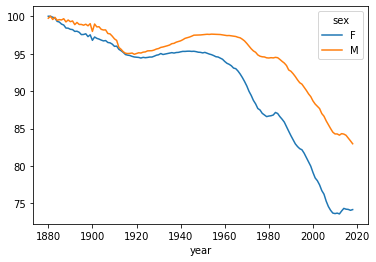

In [128]:
(top_1000.reset_index().groupby(['year', 'sex']).occurrence.sum() / \
df.reset_index().groupby(['year', 'sex']).occurrence.sum() * 100).to_frame().reset_index() \
.pivot(index='year', columns='sex', values='occurrence').plot();

### Vẽ biểu đồ thể hiện sự thay đổi trong cách đặt chữ cái 
### đầu tiên trong tên của nam và nữ qua các năm 1900, 1960 và 2018

In [160]:
years = [1900, 1960, 2018]
year_df = df.query("year in @years")
year_df.loc[:, 'first_letter'] = year_df.apply(lambda x : x['name'][0], axis=1)

/Users/nguyen_truong/opt/anaconda3/envs/nmtruong/lib/python3.9/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/nguyen_truong/opt/anaconda3/envs/nmtruong/lib/python3.9/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


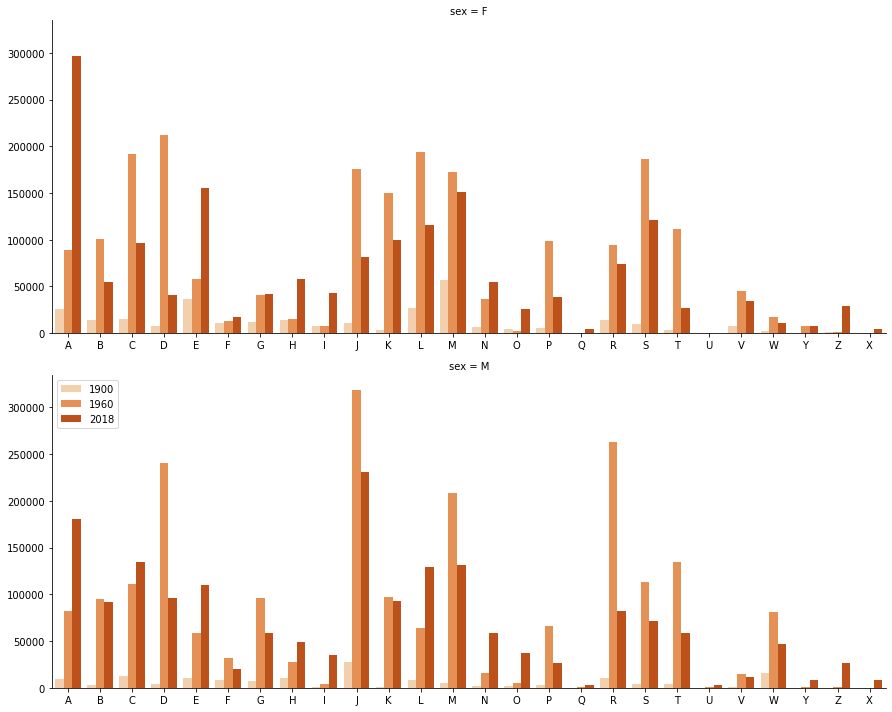

In [162]:
g = sns.FacetGrid(data=year_df.groupby(['sex', 'year', 'first_letter']).occurrence.sum().to_frame().reset_index(), 
              row='sex', aspect=2.5, height=5, sharex=False)
g.map_dataframe(sns.barplot, x='first_letter', y='occurrence', hue='year', palette='Oranges');
plt.legend();

### - Xác định xu hướng tên con trai biến thành tên con gái và ngược lại. Lấy ví dụ tên có chữ “Lesl...” 
### Ban đầu nam đặt nhiều sau đó giảm, nữ ngược lại.

In [163]:
males = df.query("sex == 'M'")
females = df.query("sex == 'F'")

male_to_female = males[males.name.isin(females.name)]
female_to_male = females[females.name.isin(males.name)]

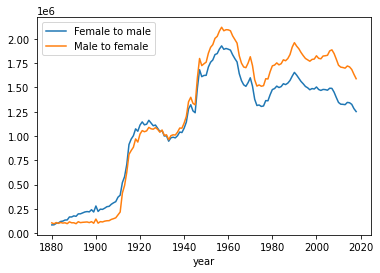

In [170]:
female_to_male.groupby('year').occurrence.sum().plot(label='Female to male')
male_to_female.groupby('year').occurrence.sum().plot(label='Male to female')
plt.legend();